In [ ]:
import pandas as pd #Data Manipulation
import numpy as np #Numerical work
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization

In [ ]:
df = sns.load_dataset("titanic")

In [ ]:
df

In [ ]:
df["pclass"].value_counts()

In [ ]:
df["age"].value_counts()

In [ ]:
df["age"].std()

In [ ]:
df["fare"].std()

In [ ]:
df["fare"].var()

In [ ]:
df.describe()

In [ ]:
df.shape

# Cleaning:  Handle Missing Values & Drop unwanted rows and columns

In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull(),cmap="bwr_r")

In [ ]:
df[df["age"].isnull()].survived.value_counts()

In [ ]:
miss_df = df[df["age"].isnull()]
miss_df

In [ ]:
c = miss_df.pclass.value_counts()
c

In [ ]:
plt.pie(c,autopct="%0.3f")

plt.show()

In [ ]:
df[(df["pclass"]==3) & (df["survived"]==0)].age.mean()

In [ ]:
df.age.mean()

In [ ]:
df["age"] = df["age"].fillna(26.5)

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df = df.drop(["deck","alone"],axis=1) #0-row, 1-column

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df["embarked"].value_counts()

In [ ]:
d = df[df["embark_town"].isnull()].index
d

In [ ]:
df = df.drop(d,axis=0)

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

# Data Visualization: Bar, Pie, Box, line, Scatter,Hist

**Line & Scatter Plotting**

In [ ]:
a = np.array([10,12,14,17,19,24,28,35,33,43])
w = np.array([40,42,40,44,46,47,48,52,55,60])
h = np.array([150,155,153,158,160,165,166,168,170,175])

In [ ]:
dataset = pd.DataFrame({"Age":a,"Weight":w,"Hight":h})

In [ ]:
dataset

In [ ]:
plt.scatter(dataset["Age"],dataset["Weight"],color="red")
plt.plot(dataset["Age"],dataset["Weight"],color="blue")

plt.title("Graph between Age & Weight")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

In [ ]:
plt.scatter(dataset["Age"],dataset["Hight"],color="red")
plt.plot(dataset["Age"],dataset["Hight"],color="blue")
plt.title("Graph between Age & Hight")
plt.xlabel("Age")
plt.ylabel("Hight")
plt.show()

**Pie chart: Categoracal data: frequancy based dataset**

In [ ]:
a = df["survived"].value_counts()
a

In [ ]:
plt.pie(a,colors=["red","green"],labels=["Not survived","Survived"],autopct="%0.3f",shadow=True,explode=(0.1,0)) #Shift + tab
plt.show()

In [ ]:
m = df["pclass"].value_counts()
m

In [ ]:
plt.pie(m,colors=["red","blue","green"],autopct="%0.2f",labels=["3rd class","1st class","2nd class"],explode=(0.1,0,0),
       shadow=True)

plt.title("Passenger Classes")
plt.show()

**Bar: Categoracal data: frequancy based dataset**

In [ ]:
df["pclass"].value_counts().plot(kind="bar",color="red")

In [ ]:
m = df["pclass"].value_counts()
m

In [ ]:
value = [i for i in m]
name = ["3rd class","1st class","2nd class"]

In [ ]:
plt.bar(name,value,color=["r","g","b"])
plt.grid()
plt.show()

In [ ]:
sns.countplot(data=df,x="pclass",hue="sex") #group plotting

**Histogram: Continous dataset: Interval frequancy based dataset**

In [ ]:
# histogram & Bar: showing frequencies of data
plt.hist(df["age"],color="red",bins=20,edgecolor="black")
plt.grid()
plt.xlabel("Ages")
plt.xticks(range(0,80,4))
plt.ylabel("Frquencies")
plt.show()

In [ ]:
sns.distplot(df["age"])

**Boxplot: continous dataset: frequency based information**

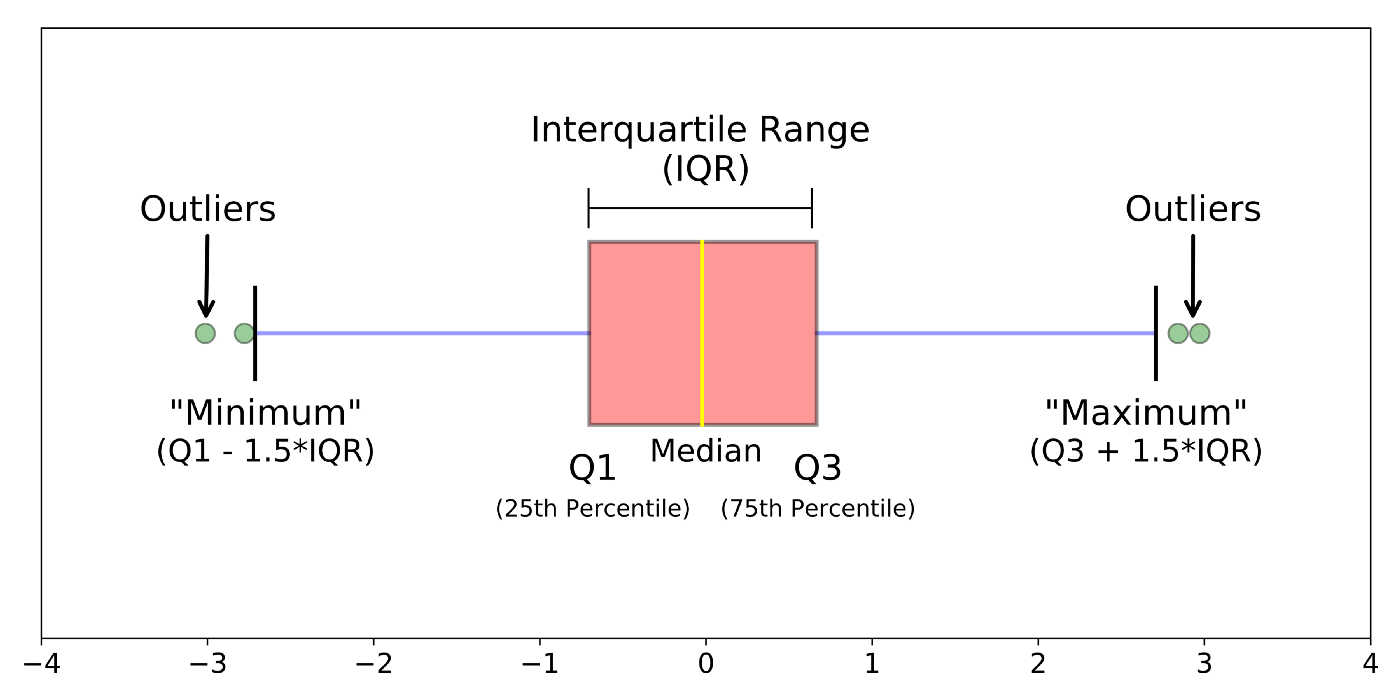

In [ ]:
sns.boxplot(y = "age",x="sex",data=df,color="red")

In [ ]:
sns.violinplot(y="age",data=df,color="green")

# Feature Scaling: Standarization & Normalization
standard scaler 

**Z-Score**
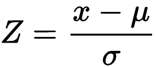


In [ ]:
df.describe()

In [ ]:
(df["age"]-29.06)/13.06

# standardization

In [ ]:
df1 = df[["age","fare"]]
df1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
scale_df = sc.fit_transform(df1)

In [ ]:
scale_df

# Normalization: MinMax (0 to 1)

In [ ]:
df1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms_scale_df = ms.fit_transform(df1)

In [ ]:
ms_scale_df

# Outlier

A outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall observation of the dataset.

**What are the impacts of having outliers in a dataset?**
1) It courses various problems during our statistical analysis

2) It may cause a significant impact on the mean and standard deviation

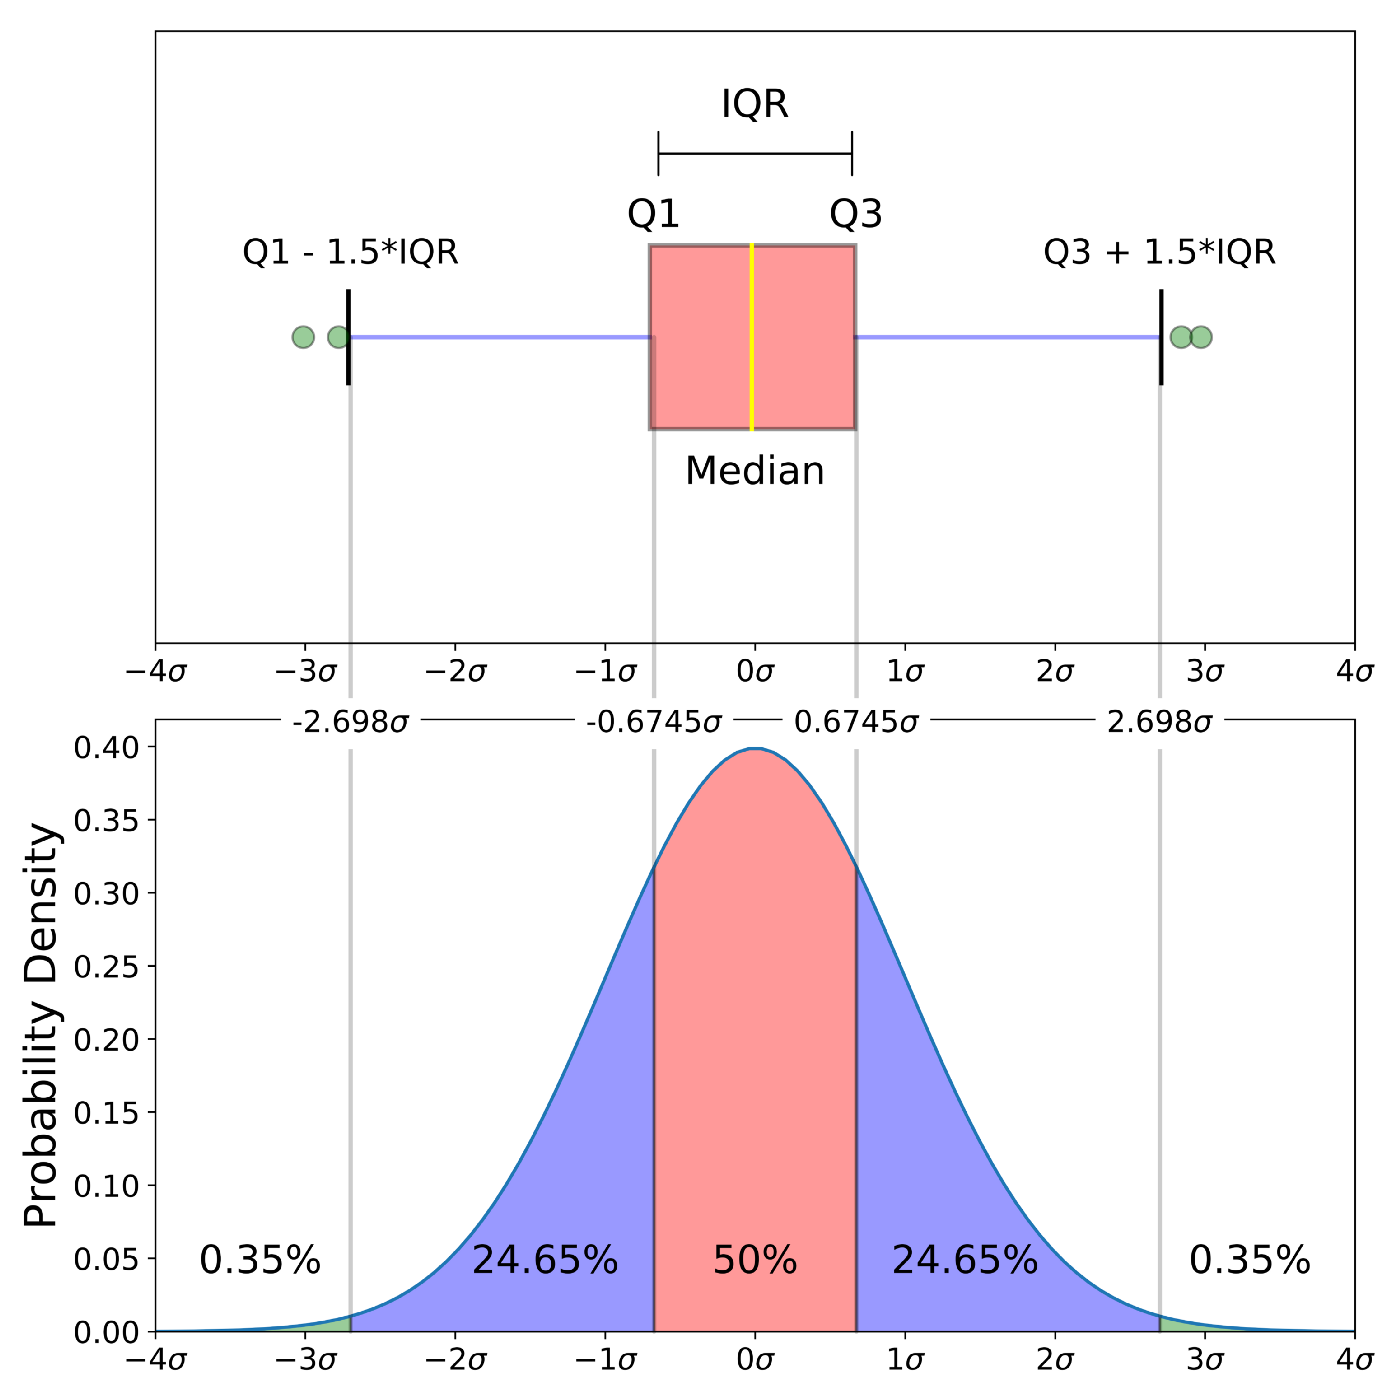

#Boxplot

In [ ]:
df["age"].describe()

In [ ]:
df2 = df[["age","fare"]]

In [ ]:
df2.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = sc.fit_transform(df2)

In [ ]:
df2

In [ ]:
#Find outlier in Age Column

In [ ]:
out = []
for var in df2[:,0]:
    if var>3 or var<-3:
        out.append(var)

In [ ]:
out

In [ ]:
for i in out:
    age = i*13.028971+29.016502
    print(age)

# Pearson correlation: Feature selection

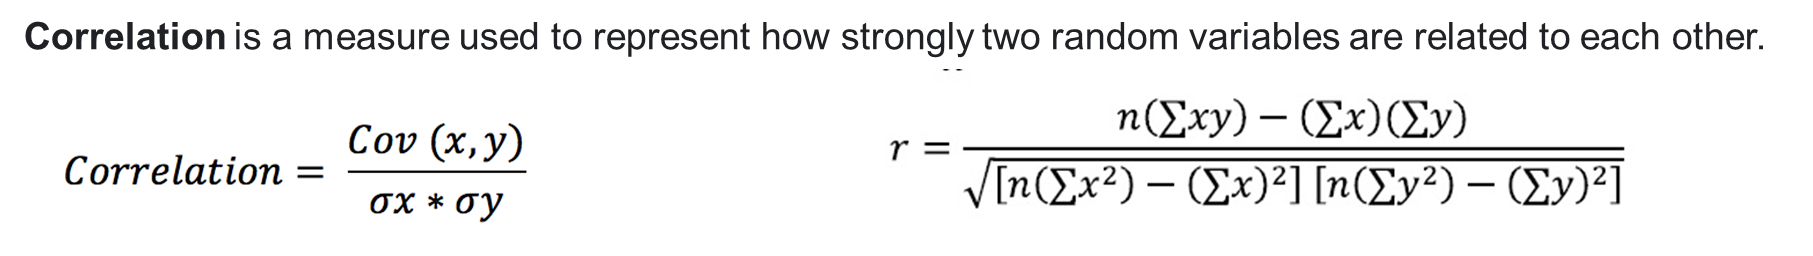

In [ ]:
df.info()

In [ ]:
df.corr()

In [ ]:
df.corr()["survived"]

In [ ]:
df.head()

# Data Transfermation

In [ ]:
df["sex"] = df["sex"].replace({"male":1,"female":0}) #labeling: LabelEncoder

In [ ]:
df.corr()["survived"]

# Get_dummies

In [ ]:
df1 = sns.load_dataset("titanic")

In [ ]:
df1.head()

In [ ]:
cat_df = df1[["sex","class"]]

In [ ]:
pd.get_dummies(cat_df)

# Matrix Plot

In [ ]:
a = df.corr()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True,cmap="inferno_r")
plt.title("Correlation of numeric dataset")
plt.show()

# Automatic EDA: Pandas-profiling

In [ ]:
#!pip install pandas-profiling 

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
prof = ProfileReport(df)

In [ ]:
prof

In [ ]:
prof.to_file(output_file='output.html')

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df)

In [ ]:
advert_report.show_html('Advertising.html')